In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/NRA.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   STATISTIC            1080 non-null   object
 1   STATISTIC Label      1080 non-null   object
 2   TLIST(A1)            1080 non-null   int64 
 3   Year                 1080 non-null   int64 
 4   C03424V04122         1080 non-null   object
 5   Local Authority      1080 non-null   object
 6   C03122V03774         1080 non-null   object
 7   Type of Carriageway  1080 non-null   object
 8   UNIT                 1080 non-null   object
 9   VALUE                848 non-null    object
dtypes: int64(2), object(8)
memory usage: 84.5+ KB


In [5]:
# Display the first few rows of the dataset
print(df.head())

  STATISTIC        STATISTIC Label  TLIST(A1)  Year C03424V04122  \
0     NRA03  National Route Length       2015  2015            -   
1     NRA03  National Route Length       2015  2015            -   
2     NRA03  National Route Length       2015  2015            -   
3     NRA03  National Route Length       2015  2015            -   
4     NRA03  National Route Length       2015  2015            -   

             Local Authority C03122V03774 Type of Carriageway    UNIT VALUE  
0  All licensing authorities            -   All Carriage ways  Number  5306  
1  All licensing authorities            1            Motorway  Number   916  
2  All licensing authorities            3              Single  Number  4096  
3  All licensing authorities            4        Two plus one  Number   NaN  
4  All licensing authorities            5    Dual carriageway  Number   294  


In [6]:
# Summary statistics
print(df.describe())

         TLIST(A1)         Year
count  1080.000000  1080.000000
mean   2018.500000  2018.500000
std       2.292349     2.292349
min    2015.000000  2015.000000
25%    2016.750000  2016.750000
50%    2018.500000  2018.500000
75%    2020.250000  2020.250000
max    2022.000000  2022.000000


In [7]:
# General information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   STATISTIC            1080 non-null   object
 1   STATISTIC Label      1080 non-null   object
 2   TLIST(A1)            1080 non-null   int64 
 3   Year                 1080 non-null   int64 
 4   C03424V04122         1080 non-null   object
 5   Local Authority      1080 non-null   object
 6   C03122V03774         1080 non-null   object
 7   Type of Carriageway  1080 non-null   object
 8   UNIT                 1080 non-null   object
 9   VALUE                848 non-null    object
dtypes: int64(2), object(8)
memory usage: 84.5+ KB
None


In [9]:
# Check for missing values
print(df.isnull().sum())

STATISTIC                0
STATISTIC Label          0
TLIST(A1)                0
Year                     0
C03424V04122             0
Local Authority          0
C03122V03774             0
Type of Carriageway      0
UNIT                     0
VALUE                  232
dtype: int64


## Data Types and Unique Values

In [10]:
# Display data types and unique values for each column
print(df.dtypes)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


STATISTIC              object
STATISTIC Label        object
TLIST(A1)               int64
Year                    int64
C03424V04122           object
Local Authority        object
C03122V03774           object
Type of Carriageway    object
UNIT                   object
VALUE                  object
dtype: object
STATISTIC: 1 unique values
STATISTIC Label: 1 unique values
TLIST(A1): 8 unique values
Year: 8 unique values
C03424V04122: 27 unique values
Local Authority: 27 unique values
C03122V03774: 5 unique values
Type of Carriageway: 5 unique values
UNIT: 1 unique values
VALUE: 122 unique values


## Univariate Analysis

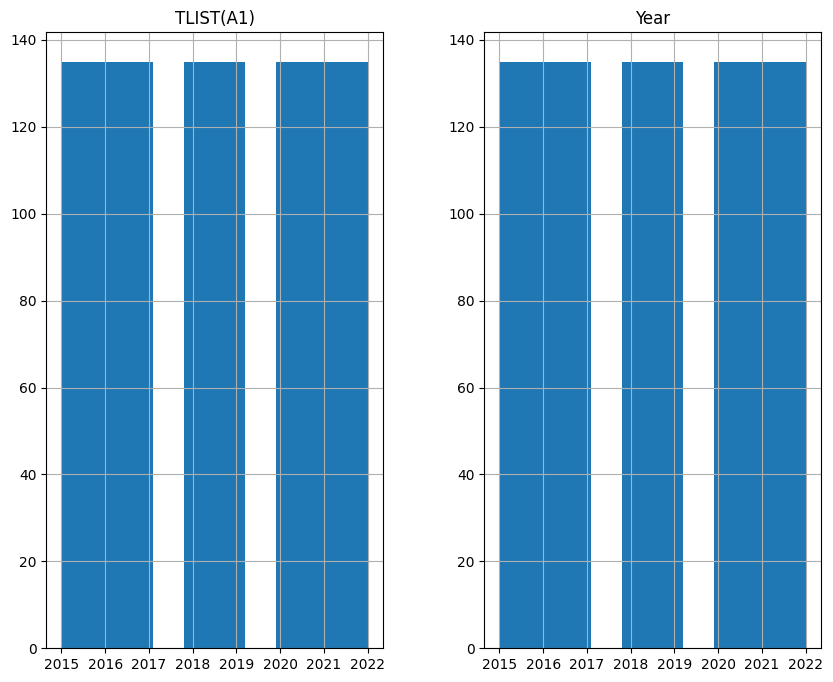


STATISTIC:
NRA03    1080
Name: STATISTIC, dtype: int64

STATISTIC Label:
National Route Length    1080
Name: STATISTIC Label, dtype: int64

C03424V04122:
-     40
14    40
25    40
24    40
23    40
22    40
21    40
20    40
19    40
18    40
17    40
16    40
15    40
13    40
1     40
12    40
11    40
10    40
9     40
8     40
7     40
6     40
5     40
4     40
3     40
2     40
26    40
Name: C03424V04122, dtype: int64

Local Authority:
All licensing authorities    40
Cork                         40
Donegal                      40
Cavan                        40
Sligo                        40
Roscommon                    40
Mayo                         40
Leitrim                      40
Galway                       40
Waterford                    40
Tipperary                    40
Limerick                     40
Kerry                        40
Clare                        40
Carlow                       40
Wicklow                      40
Wexford                      40
Westmea

In [11]:
# Histogram for numerical columns
df.hist(figsize=(10, 8))
plt.show()

# Value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:\n{df[col].value_counts()}")


## Bivariate Analysis

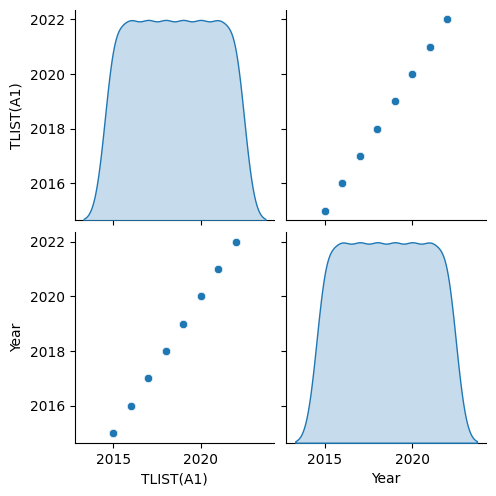

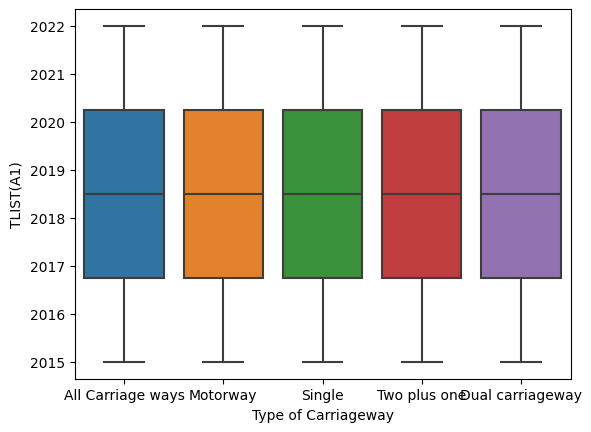

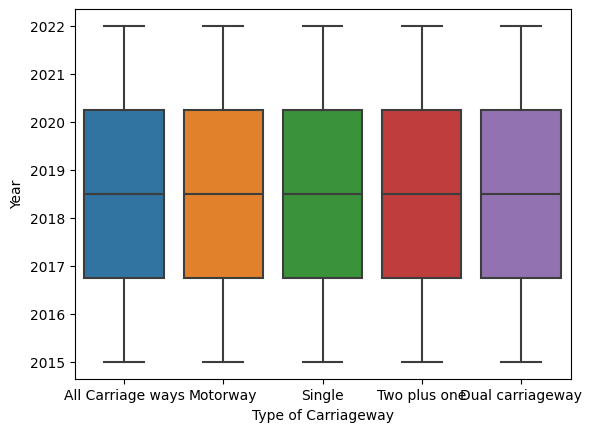

In [12]:
# Scatter plot between numerical columns
sns.pairplot(df, diag_kind='kde')
plt.show()

# Box plot for numerical columns vs. categorical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(x='Type of Carriageway', y=col, data=df)
    plt.show()


## Correlation Analysis

<ipython-input-13-23bc68694687>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


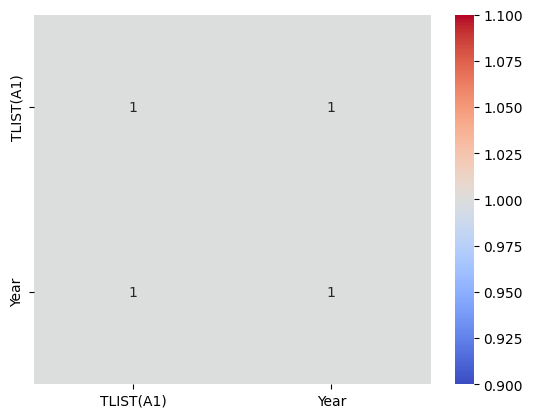

In [13]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Feature Relationships

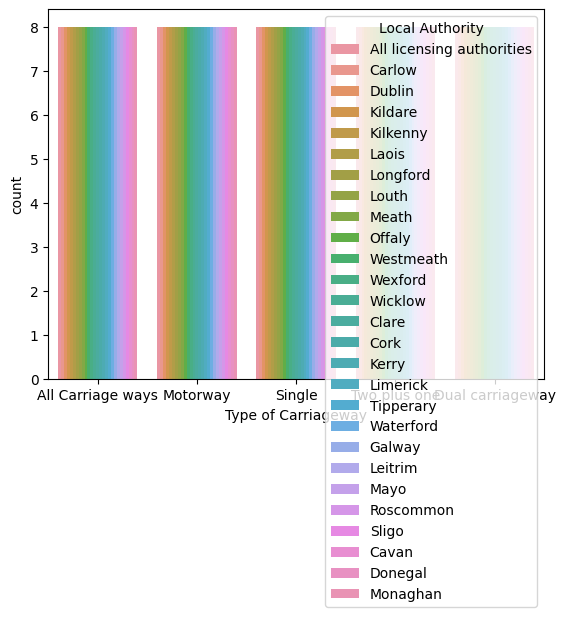

In [17]:
# Relationship between categorical variables
sns.countplot(x='Type of Carriageway', hue='Local Authority', data=df)
plt.show()

## Outlier Detection

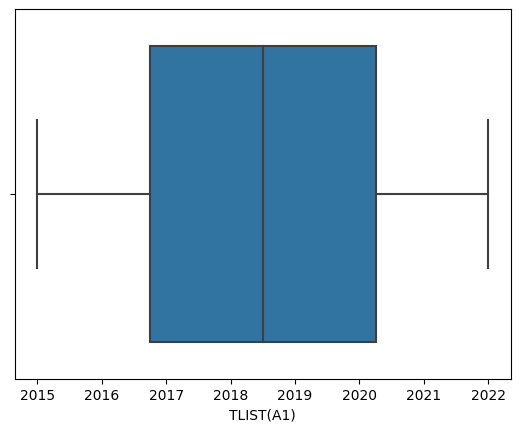

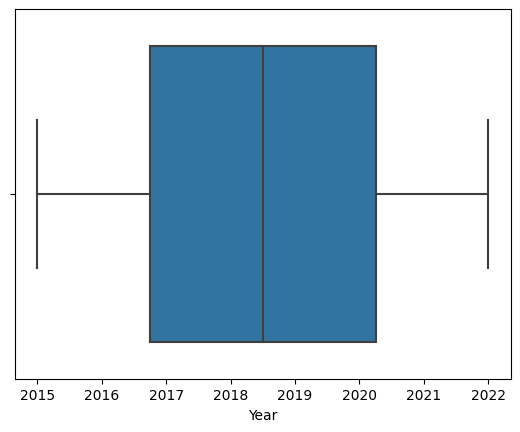

In [15]:
# Identify and handle outliers
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(x=df[col])
    plt.show()


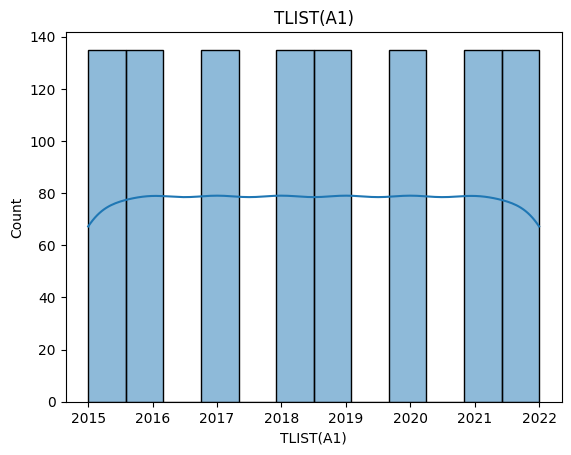

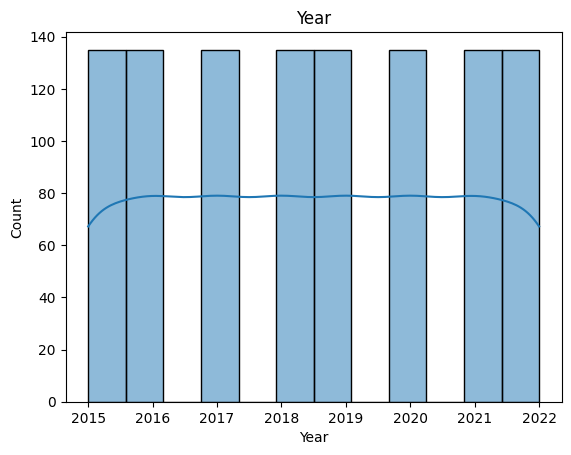

In [20]:
# Distribution of numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


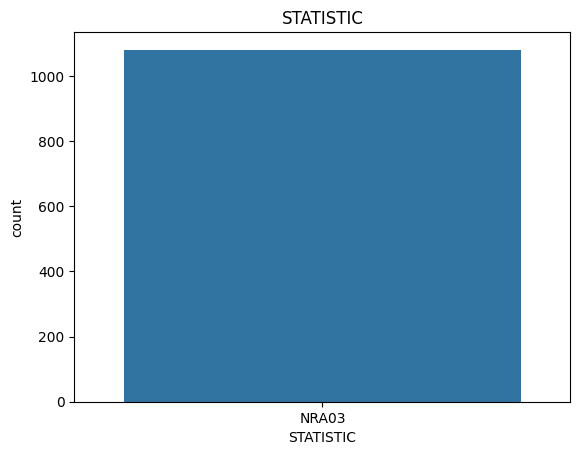

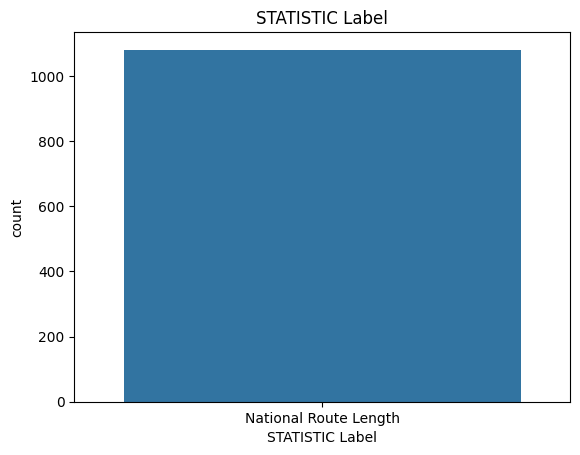

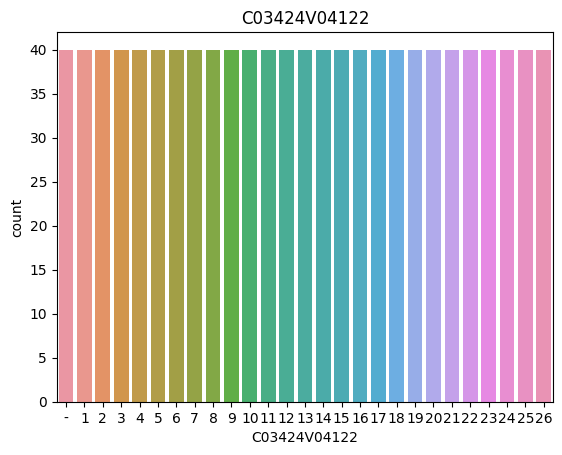

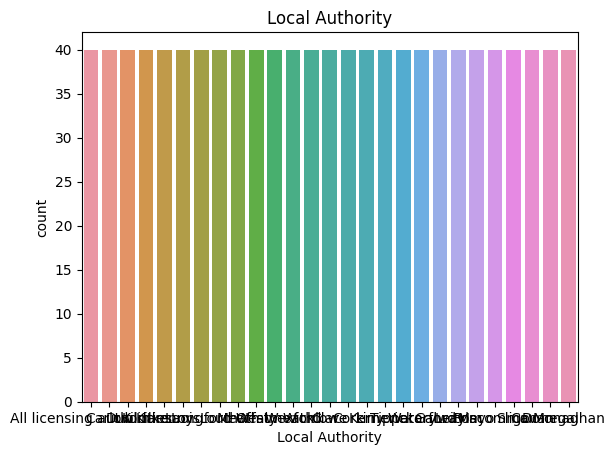

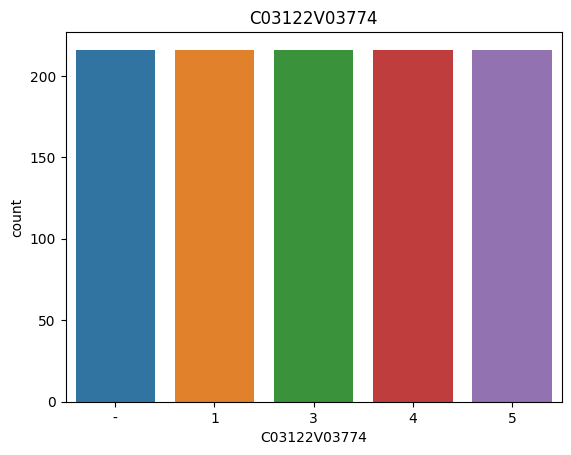

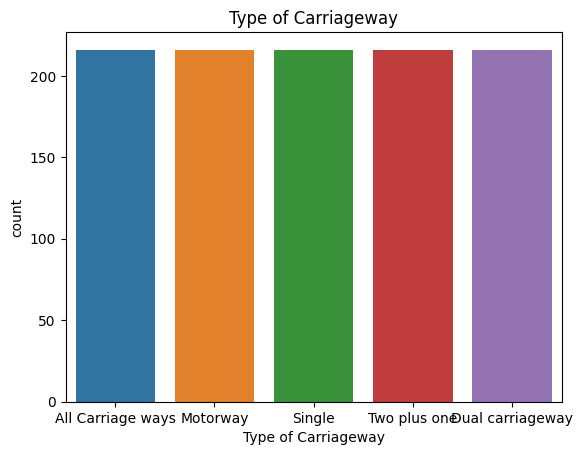

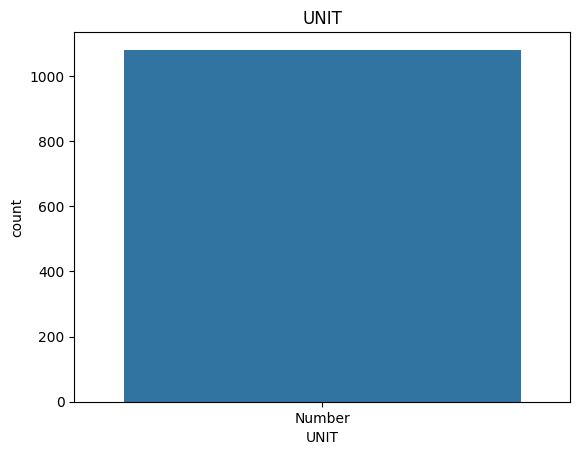

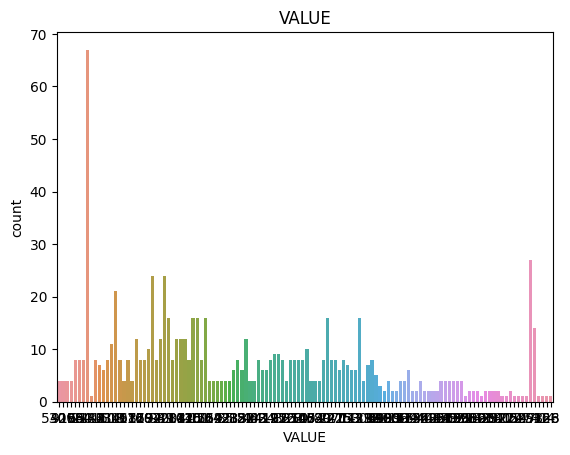

In [21]:
# Countplot for each categorical column
for col in df.select_dtypes(include='object').columns:
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.show()


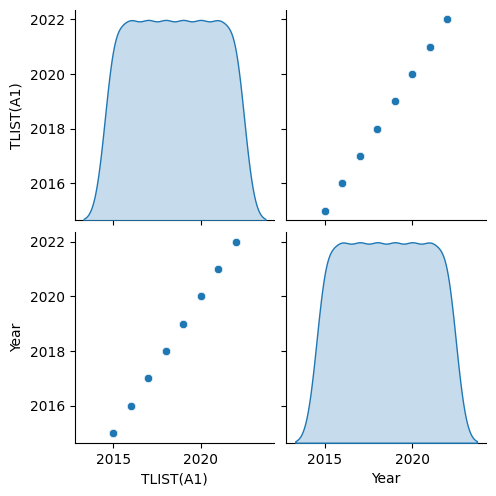

In [24]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind='kde')
plt.show()



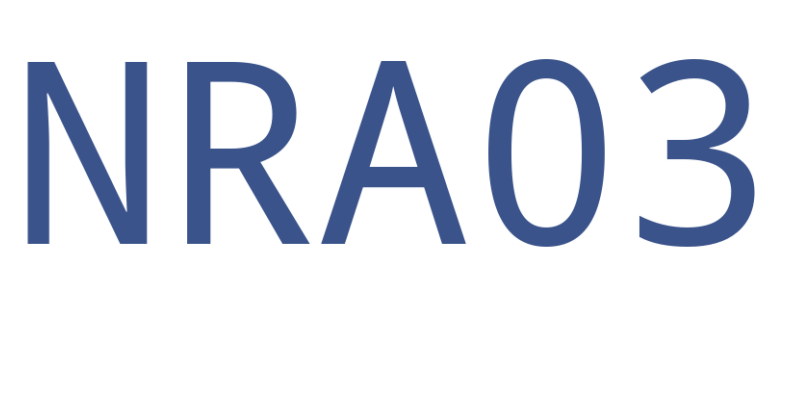

In [25]:
# Example: Word cloud for 'STATISTIC'
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df['STATISTIC']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
